<a href="https://colab.research.google.com/github/hyuk-k/hyuk-k/blob/main/Seoul_HanRiver_project02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제: 코로나로 인한 한강 이용객 변화....~~
## 팀: 공원을 돌려조


In [1]:
!apt-get update
!apt-get install -y fonts-nanum
!fo-cache -fv
!rm ~/.cache/matplotlib -rf

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [3]:
import warnings
warnings.filterwarnings('ignore')

### 파일 업로드 확인

In [4]:
ls -l

total 196
-rw-r--r-- 1 root root 88054 Sep  7 05:00 '서울특별시 코로나19 확진자 발생동향.csv'
-rw-r--r-- 1 root root  3505 Sep  7 05:00 '서울특별시 코로나19 자치구별 확진자 발생동향_수정.csv'
-rw-r--r-- 1 root root   958 Sep  7 05:00 '서울시 한강공원 이용객 현황 (2010년).csv'
-rw-r--r-- 1 root root 27648 Sep  7 05:00 '서울시 한강공원 이용객 현황 통계(2020년).xls'
drwxr-xr-x 1 root root  4096 Sep  1 19:26  sample_data/
-rw-r--r-- 1 root root 20992 Sep  7 05:00 '한강 이용 목적.xls'
-rw-r--r-- 1 root root 17920 Sep  7 05:00 '한강 이용 만족도.xls'
-rw-r--r-- 1 root root 20992 Sep  7 05:00 '서울시 한강시민공원 이용여부 및 주이유 통계.xls'


In [5]:
import pandas as pd
SCD = pd.read_csv('서울특별시 코로나19 확진자 발생동향.csv', encoding = 'cp949')
SCD.head()

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),전국 기준일,전국 확진,전국 추가 확진,전국 치료중,전국 퇴원,전국 사망,전국 의심환자 전체,전국 의심환자 검사중,전국 의심환자 검사결과(음성),자가격리자 해외입국자 감시중,자가격리자 해외입국자 감시해제,자가격리자 접촉자 감시중,자가격리자 접촉자 감시해제,확인중 확진자
0,2021.09.02.00,80577,559,9291,70699,801,587,NaN,NaN,NaN,2021.09.02.00,255401,1961,26876,226222,2303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2021.09.01.00,80019,665,9537,69898,497,584,NaN,NaN,NaN,2021.09.01.00,253445,2025,26834,224319,2292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2021.08.31.00,79354,456,9370,69401,364,583,NaN,NaN,NaN,2021.08.31.00,251421,1372,27435,221701,2285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2021.08.30.00,78899,444,9280,69037,551,582,NaN,NaN,NaN,2021.08.30.00,250051,1487,27409,220358,2284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2021.08.29.00,78455,517,9388,68486,599,581,NaN,NaN,NaN,2021.08.29.00,248568,1619,27563,218726,2279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [6]:
import pandas as pd
SCVD = pd.read_csv('서울특별시 코로나19 자치구별 확진자 발생동향_수정.csv', encoding = 'cp949')
SCVD.head()

,행 레이블,합계 : 종로구,합계 : 중구,합계 : 용산구,합계 : 성동구,합계 : 광진구,합계 : 동대문구,합계 : 중랑구,합계 : 성북구,합계 : 강북구,합계 : 도봉구,합계 : 노원구,합계 : 은평구,합계 : 서대문구,합계 : 마포구,합계 : 양천구,합계 : 강서구,합계 : 구로구,합계 : 금천구,합계 : 영등포구,합계 : 동작구,합계 : 관악구,합계 : 서초구,합계 : 강남구,합계 : 송파구,합계 : 강동구,합계 : 기타
0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020.02,22,0,0,6,3,3,2,4,0,0,15,14,10,2,2,4,2,2,0,2,6,9,13,24,8,20
2,2020.03,358,34,122,129,91,566,184,302,128,74,460,483,243,253,369,410,521,146,334,276,448,330,545,511,188,569
3,2020.04,481,168,512,454,233,916,471,635,150,250,682,809,518,677,621,749,1050,360,675,894,1242,1077,1744,1080,383,1292
4,2020.05,538,236,968,765,350,1021,536,829,264,420,817,927,669,757,739,987,1127,400,800,1114,1597,1245,2149,1307,578,1524


In [7]:
import pandas as pd
SCVD = pd.read_csv('서울특별시 코로나19 자치구별 확진자 발생동향_수정.csv', encoding = 'cp949')
SCVD.head()

,행 레이블,합계 : 종로구,합계 : 중구,합계 : 용산구,합계 : 성동구,합계 : 광진구,합계 : 동대문구,합계 : 중랑구,합계 : 성북구,합계 : 강북구,합계 : 도봉구,합계 : 노원구,합계 : 은평구,합계 : 서대문구,합계 : 마포구,합계 : 양천구,합계 : 강서구,합계 : 구로구,합계 : 금천구,합계 : 영등포구,합계 : 동작구,합계 : 관악구,합계 : 서초구,합계 : 강남구,합계 : 송파구,합계 : 강동구,합계 : 기타
0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020.02,22,0,0,6,3,3,2,4,0,0,15,14,10,2,2,4,2,2,0,2,6,9,13,24,8,20
2,2020.03,358,34,122,129,91,566,184,302,128,74,460,483,243,253,369,410,521,146,334,276,448,330,545,511,188,569
3,2020.04,481,168,512,454,233,916,471,635,150,250,682,809,518,677,621,749,1050,360,675,894,1242,1077,1744,1080,383,1292
4,2020.05,538,236,968,765,350,1021,536,829,264,420,817,927,669,757,739,987,1127,400,800,1114,1597,1245,2149,1307,578,1524


In [8]:
import pandas as pd
HP = pd.read_excel('한강 이용 목적.xls',
                   header = 0,
                   usecols = 'B, C, D, E, F, G,H, I,J, K')
                   #encoding = 'utf-8')
HP.head()

,대분류,분류,계,이용한 적 없다,산책과 휴식,운동,동호회/ 레저 활동,공연관람 등 행사 참석,자연 학습장/ 생태공원 방문 등 교육 목적,기타
0,서울시,서울시,100,37.9,46.1,8.6,2.5,3.0,1.8,0
1,성별,남자,100,36.4,45.8,10.4,3.0,2.9,1.5,0
2,성별,여자,100,39.5,46.4,6.8,2.1,3.2,2.0,0
3,연령별,10대,100,40.1,36.5,10.3,2.0,5.5,5.6,0.1
4,연령별,20대,100,31.1,49.5,8.4,4.8,5.0,1.1,0


In [9]:
import pandas as pd
HPS = pd.read_excel('한강 이용 만족도.xls',
                   header = 0,
                   usecols = 'B, C, D, E, F, G,H, I,J, K')
                   #encoding = 'utf-8')
HPS.head()

,대분류,분류,계,매우 불만족,약간 불만족,보통,약간 만족,매우 만족
0,서울시,서울시,100,1.2,3.1,19.8,62.4,13.4
1,성별,남자,100,1.2,3.1,19.2,63.8,12.7
2,성별,여자,100,1.2,3.2,20.5,61.1,14.2
3,연령별,10대,100,1.0,2.7,21.1,63.8,11.4
4,연령별,20대,100,1.6,3.4,20.1,61.0,13.9


In [10]:
import pandas as pd
HP_2020 = pd.read_excel('서울시 한강공원 이용객 현황 통계(2020년).xls',
                   header = 0,
                   usecols = 'A, B, C, D, E, F, G,H, I,J, K')
                   #encoding = 'utf-8')
HP_2020.head()

,기간,구분,구별,합계,일반이용자,운동시설,자전거,주요행사 및 마라톤,특화공원,기타
0,2020,광나루,강동구,3392793,1617882,316796,1393746,11668,-,52701
1,2020,잠실,송파구,3773509,1774453,462433,1508058,18099,-,10466
2,2020,뚝섬,광진구,17689332,7979456,3571146,3502421,102394,2073646,460269
3,2020,잠원,서초구,2381538,855661,738488,770398,340,-,16651
4,2020,반포,서초구,4755877,1672432,681377,1217409,151628,956914,76117


In [11]:
import pandas as pd
HP_2010 = pd.read_csv('서울시 한강공원 이용객 현황 (2010년).csv', encoding = 'cp949')
HP_2010.head()

,년도,구분,구별,일반이용자,운동시설,자전거,주요행사 및 마라톤,특화공원,기타,합계
0,2010년,광나루,강동구,1378248,107401,967040,95084,0,266760,2814533
1,2010년,잠실,송파구,1856117,100002,493189,99467,0,248756,2797531
2,2010년,뚝섬,광진구,4066798,1073104,1278201,443660,112013,890799,7864575
3,2010년,잠원,서초구,730872,449560,754869,38391,0,733652,2707344
4,2010년,반포,서초구,1433940,161801,666576,578031,182966,205182,3228496


In [12]:
import pandas as pd
HPV = pd.read_excel('서울시 한강시민공원 이용여부 및 주이유 통계.xls',
                   header = 0,
                   usecols = 'A, B, C, D, E, F, G, H, I, J, K')
                   #encoding = 'utf-8')
HPV.head()

,기간,대분류,분류,계,이용한 적 없다,산책과 휴식,운동,동호회/ 레저 활동,공연관람 등 행사 참석,자연 학습장/ 생태공원 방문 등 교육 목적,기타
0,2010,서울시,서울시,100,37.9,46.1,8.6,2.5,3.0,1.8,0
1,2010,성별,남자,100,36.4,45.8,10.4,3.0,2.9,1.5,0
2,2010,성별,여자,100,39.5,46.4,6.8,2.1,3.2,2.0,0
3,2010,연령별,10대,100,40.1,36.5,10.3,2.0,5.5,5.6,0.1
4,2010,연령별,20대,100,31.1,49.5,8.4,4.8,5.0,1.1,0


In [13]:
HP_2010['구분'].unique()

array(['광나루', '잠실', '뚝섬', '잠원', '반포', '이촌', '여의도', '양화', '망원', '선유도',
       '난지', '강서', '합계'], dtype=object)

In [14]:
HP_2020['구분'].unique()

array(['광나루', '잠실', '뚝섬', '잠원', '반포', '이촌', '여의도', '양화', '망원', '난지', '강서',
       '합계'], dtype=object)

In [15]:
SCVD.rename(columns={SCVD.columns[0]:'월별',
                     SCVD.columns[1]:'종로구',
                     SCVD.columns[2]:'중구',
                     SCVD.columns[3]:'용산구',
                     SCVD.columns[4]:'성동구',
                     SCVD.columns[5]:'광진구',
                     SCVD.columns[6]:'동대문구',
                     SCVD.columns[7]:'중랑구',
                     SCVD.columns[8]:'성북구',
                     SCVD.columns[9]:'강북구',
                     SCVD.columns[10]:'도봉구',
                     SCVD.columns[11]:'노원구',
                     SCVD.columns[12]:'은평구',
                     SCVD.columns[13]:'서대문구',
                     SCVD.columns[14]:'마포구',
                     SCVD.columns[15]:'양천구',
                     SCVD.columns[16]:'강서구',
                     SCVD.columns[17]:'구로구',
                     SCVD.columns[18]:'금천구',
                     SCVD.columns[19]:'영등포구',
                     SCVD.columns[20]:'동작구',
                     SCVD.columns[21]:'관악구',
                     SCVD.columns[22]:'서초구',
                     SCVD.columns[23]:'강남구',
                     SCVD.columns[24]:'송파구',
                     SCVD.columns[25]:'강동구',
                     SCVD.columns[26]:'기타'}, inplace=True)

SCVD.head(22)

,월별,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020.02,22,0,0,6,3,3,2,4,0,0,15,14,10,2,2,4,2,2,0,2,6,9,13,24,8,20
2,2020.03,358,34,122,129,91,566,184,302,128,74,460,483,243,253,369,410,521,146,334,276,448,330,545,511,188,569
3,2020.04,481,168,512,454,233,916,471,635,150,250,682,809,518,677,621,749,1050,360,675,894,1242,1077,1744,1080,383,1292
4,2020.05,538,236,968,765,350,1021,536,829,264,420,817,927,669,757,739,987,1127,400,800,1114,1597,1245,2149,1307,578,1524
5,2020.06,614,310,1372,1398,459,1067,793,933,650,1250,1114,1351,980,962,1822,2036,2099,764,1494,1398,2426,1492,2385,1549,966,2150
6,2020.07,777,490,1623,1643,615,1279,1319,1173,774,1947,1516,1785,1202,1445,2177,2713,2748,1108,2095,1976,4176,1857,2825,2195,1357,2726
7,2020.08,1244,973,2279,2160,1504,2231,2369,4463,1725,2772,3286,3294,1756,2494,2913,4418,3359,1482,2736,3069,5337,2894,3853,4689,2519,4857
8,2020.09,2401,1634,3372,3246,3604,4099,5301,9462,4056,5041,8481,6920,3475,4524,5046,7741,4943,2523,5034,6228,9928,5244,7184,9206,5229,9902
9,2020.10,2857,1899,4182,3975,4186,5183,6150,10584,4771,6784,9908,7993,4127,5473,5685,9128,5999,2968,6132,7801,13452,6452,9074,11076,6029,13679


In [16]:
SCVD.drop([0], inplace=True)
SCVD.head(22)

,월별,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
1,2020.02,22,0,0,6,3,3,2,4,0,0,15,14,10,2,2,4,2,2,0,2,6,9,13,24,8,20
2,2020.03,358,34,122,129,91,566,184,302,128,74,460,483,243,253,369,410,521,146,334,276,448,330,545,511,188,569
3,2020.04,481,168,512,454,233,916,471,635,150,250,682,809,518,677,621,749,1050,360,675,894,1242,1077,1744,1080,383,1292
4,2020.05,538,236,968,765,350,1021,536,829,264,420,817,927,669,757,739,987,1127,400,800,1114,1597,1245,2149,1307,578,1524
5,2020.06,614,310,1372,1398,459,1067,793,933,650,1250,1114,1351,980,962,1822,2036,2099,764,1494,1398,2426,1492,2385,1549,966,2150
6,2020.07,777,490,1623,1643,615,1279,1319,1173,774,1947,1516,1785,1202,1445,2177,2713,2748,1108,2095,1976,4176,1857,2825,2195,1357,2726
7,2020.08,1244,973,2279,2160,1504,2231,2369,4463,1725,2772,3286,3294,1756,2494,2913,4418,3359,1482,2736,3069,5337,2894,3853,4689,2519,4857
8,2020.09,2401,1634,3372,3246,3604,4099,5301,9462,4056,5041,8481,6920,3475,4524,5046,7741,4943,2523,5034,6228,9928,5244,7184,9206,5229,9902
9,2020.10,2857,1899,4182,3975,4186,5183,6150,10584,4771,6784,9908,7993,4127,5473,5685,9128,5999,2968,6132,7801,13452,6452,9074,11076,6029,13679
10,2020.11,3194,2466,5284,5339,4665,7168,6956,11901,5093,7873,11377,9214,5683,6604,6685,11982,6863,3132,7250,9293,14988,9518,12343,14817,6929,16916


In [17]:
SCVD['월별합계'] = SCVD['종로구']+SCVD['용산구']+SCVD['성동구'] +SCVD['광진구']+SCVD['동대문구'] +SCVD['중랑구'] +SCVD['성북구'] +SCVD['강북구'] +SCVD['도봉구']+SCVD['노원구'] +SCVD['은평구'] +SCVD['서대문구'] +SCVD['마포구'] +SCVD['양천구'] +SCVD['강서구']+SCVD['구로구'] +SCVD['금천구'] +SCVD['영등포구'] +SCVD['동작구']+SCVD['관악구']+SCVD['서초구']+SCVD['강남구']+SCVD['송파구']+SCVD['강동구']+SCVD['기타']     

SCVD.head()

,월별,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타,월별합계
1,2020.02,22,0,0,6,3,3,2,4,0,0,15,14,10,2,2,4,2,2,0,2,6,9,13,24,8,20,173
2,2020.03,358,34,122,129,91,566,184,302,128,74,460,483,243,253,369,410,521,146,334,276,448,330,545,511,188,569,8040
3,2020.04,481,168,512,454,233,916,471,635,150,250,682,809,518,677,621,749,1050,360,675,894,1242,1077,1744,1080,383,1292,17955
4,2020.05,538,236,968,765,350,1021,536,829,264,420,817,927,669,757,739,987,1127,400,800,1114,1597,1245,2149,1307,578,1524,22428
5,2020.06,614,310,1372,1398,459,1067,793,933,650,1250,1114,1351,980,962,1822,2036,2099,764,1494,1398,2426,1492,2385,1549,966,2150,33524


In [18]:
SCVD.sort_values(by='월별합계', ascending = False).head(7)

,월별,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타,월별합계
21,총합계,201208,171032,312914,313882,349737,404231,473481,484700,308324,350198,511713,488520,297350,390728,408056,600489,396704,192899,436093,486235,586367,494490,676817,675888,424398,1072440,11337862
19,2021.08,35481,33859,66477,64944,74152,74589,87030,87681,60564,62095,94732,93307,60202,82804,75364,102081,78375,41622,91996,97402,122443,103212,158863,134383,86283,171994,2208076
18,2021.07,28791,26238,52002,53035,59470,63232,73189,72215,49676,53182,80060,74599,45002,61812,59916,83837,59066,30202,68780,73841,86586,80781,123154,106900,70201,149133,1758662
17,2021.06,23654,21293,38418,39071,46568,52075,62494,58553,40652,43560,64985,60739,35469,45209,48985,68257,46889,23454,52633,58618,64874,61051,84772,85072,56736,129362,1392150
16,2021.05,23156,20349,34572,35905,42849,49323,58971,54755,36428,41710,59682,58832,32058,41654,47059,67166,44751,20699,48423,55523,61899,55520,71298,75498,50647,128572,1296950
15,2021.04,19518,16656,28269,28202,33215,37730,46393,44485,27784,32359,46795,46569,26261,34150,38781,56848,37345,15982,38392,44549,49823,43231,51652,58983,38709,111602,1037627
14,2021.03,18188,14900,25659,24071,27407,33887,39077,40464,24764,29409,41311,39268,24342,30912,35562,53008,34005,14818,34821,38744,44054,35737,43288,51714,32652,106531,923693


In [19]:
HP_S = pd.merge(HP_2010, HP_2020, on='구분')

HP_S.head()

,년도,구분,구별_x,일반이용자_x,운동시설_x,자전거_x,주요행사 및 마라톤_x,특화공원_x,기타_x,합계_x,기간,구별_y,합계_y,일반이용자_y,운동시설_y,자전거_y,주요행사 및 마라톤_y,특화공원_y,기타_y
0,2010년,광나루,강동구,1378248,107401,967040,95084,0,266760,2814533,2020,강동구,3392793,1617882,316796,1393746,11668,-,52701
1,2010년,잠실,송파구,1856117,100002,493189,99467,0,248756,2797531,2020,송파구,3773509,1774453,462433,1508058,18099,-,10466
2,2010년,뚝섬,광진구,4066798,1073104,1278201,443660,112013,890799,7864575,2020,광진구,17689332,7979456,3571146,3502421,102394,2073646,460269
3,2010년,잠원,서초구,730872,449560,754869,38391,0,733652,2707344,2020,서초구,2381538,855661,738488,770398,340,-,16651
4,2010년,반포,서초구,1433940,161801,666576,578031,182966,205182,3228496,2020,서초구,4755877,1672432,681377,1217409,151628,956914,76117


In [20]:
del HP_S['일반이용자_x']
del HP_S['운동시설_x']
del HP_S['자전거_x']
del HP_S['주요행사 및 마라톤_x']
del HP_S['특화공원_x']
del HP_S['기타_x']
del HP_S['구별_y']
del HP_S['일반이용자_y']
del HP_S['운동시설_y']
del HP_S['자전거_y']
del HP_S['주요행사 및 마라톤_y']
del HP_S['특화공원_y']
del HP_S['기타_y']

HP_S.head()

,년도,구분,구별_x,합계_x,기간,합계_y
0,2010년,광나루,강동구,2814533,2020,3392793
1,2010년,잠실,송파구,2797531,2020,3773509
2,2010년,뚝섬,광진구,7864575,2020,17689332
3,2010년,잠원,서초구,2707344,2020,2381538
4,2010년,반포,서초구,3228496,2020,4755877


In [21]:
HP_S.rename(columns= {HP_S.columns[0]:'년도_2010',
                     HP_S.columns[1]:'한강지구',
                     HP_S.columns[2]:'구별',
                     HP_S.columns[3]:'2010년 이용인원',
                     HP_S.columns[4]:'년도_2020',
                     HP_S.columns[5]:'2020년 이용인원'}, inplace=True)

HP_S.head(12)


,년도_2010,한강지구,구별,2010년 이용인원,년도_2020,2020년 이용인원
0,2010년,광나루,강동구,2814533,2020,3392793
1,2010년,잠실,송파구,2797531,2020,3773509
2,2010년,뚝섬,광진구,7864575,2020,17689332
3,2010년,잠원,서초구,2707344,2020,2381538
4,2010년,반포,서초구,3228496,2020,4755877
5,2010년,이촌,용산구,3486082,2020,2291528
6,2010년,여의도,영등포구,23101475,2020,9518870
7,2010년,양화,영등포구,2101309,2020,3638673
8,2010년,망원,마포구,4549884,2020,2333194
9,2010년,난지,마포구,4784627,2020,2941988


In [22]:
HP_S.set_index('구별', inplace=True)
HP_S.head()

,년도_2010,한강지구,2010년 이용인원,년도_2020,2020년 이용인원
구별,,,,,
강동구,2010년,광나루,2814533,2020,3392793
송파구,2010년,잠실,2797531,2020,3773509
광진구,2010년,뚝섬,7864575,2020,17689332
서초구,2010년,잠원,2707344,2020,2381538
서초구,2010년,반포,3228496,2020,4755877


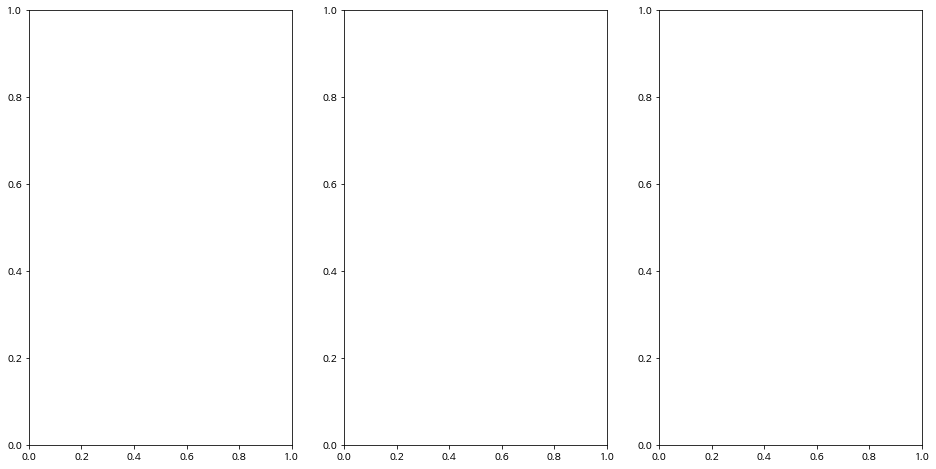

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

figure, ax=plt.subplots(1,3,figsize=(16,8))

In [27]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [28]:
import numpy as np

In [29]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.2.2
설치 위치:  /usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib


In [30]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc


In [31]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

27


In [32]:
font_list_OS = fm.OSXInstalledFonts()
print(len(font_list_OS))

0


In [33]:
# 시스템 폰트에서 읽어온 리스트에서 상위 10개만 출력
font_list[:10] 

['/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf']

In [34]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumSquareRound', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'),
 ('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'),
 ('NanumSquare', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'),
 ('NanumSquareRound', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'),
 ('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'),
 ('NanumSquare', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf')]

In [35]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['NanumBarunGothic']


In [36]:
# serif, sans-serif, monospace
print('serif 세리프가 있는 폰트--------')
print (plt.rcParams['font.serif']) 
print('sans-serif 세리프가 없는 폰트 --------')
print (plt.rcParams['font.sans-serif']) 
print('monospace 고정폭 글꼴--------')
print (plt.rcParams['font.monospace']) 

serif 세리프가 있는 폰트--------
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
sans-serif 세리프가 없는 폰트 --------
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
monospace 고정폭 글꼴--------
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


In [41]:
plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)

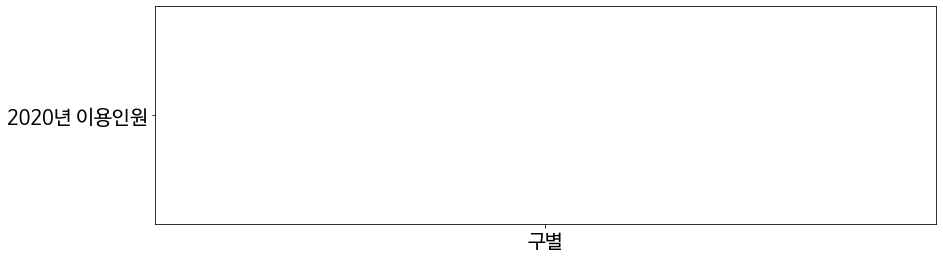

In [42]:
import matplotlib.pyplot as plt
import numpy as np
 
plt.bar('구별', '2020년 이용인원')
plt.show()

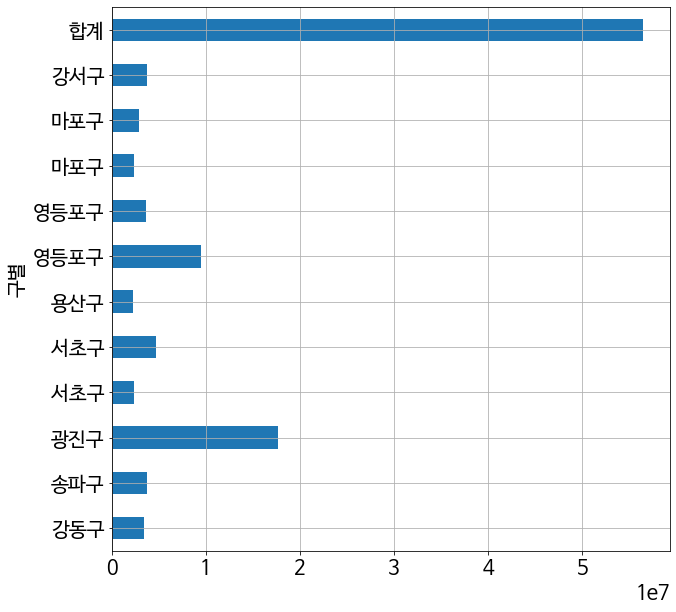

In [45]:
import matplotlib.pyplot as plt

HP_S['2020년 이용인원'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

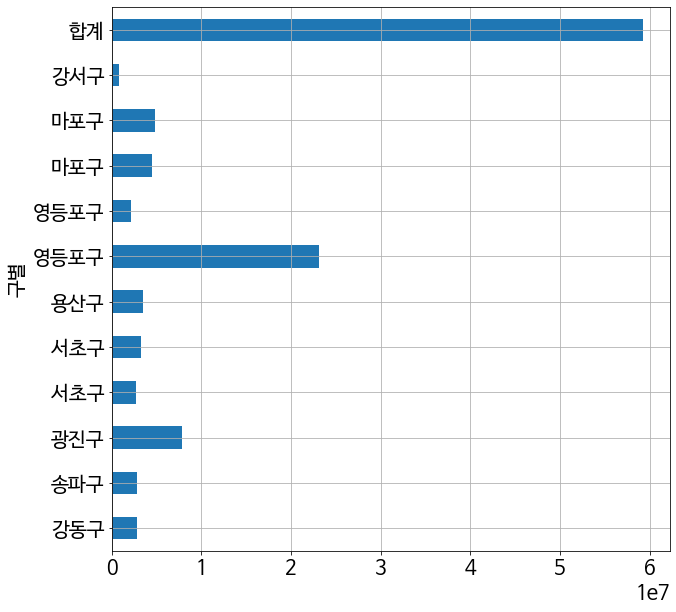

In [46]:
import matplotlib.pyplot as plt

HP_S['2010년 이용인원'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

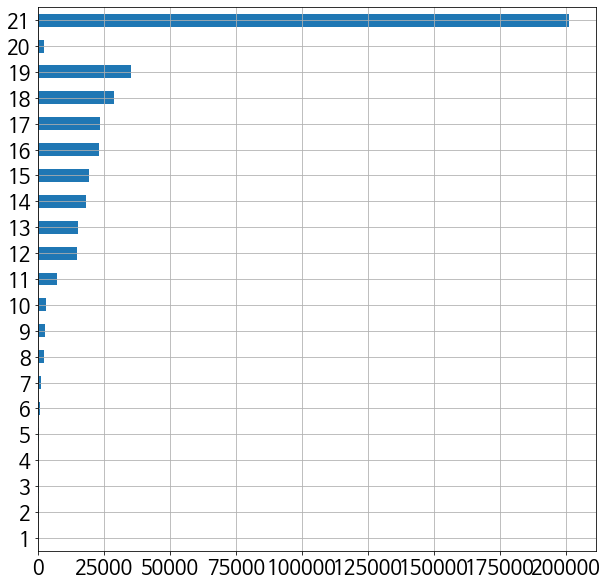

In [49]:
import matplotlib.pyplot as plt

SCVD['종로구'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()